In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
#from sklearn.model_selection import GridSearchCV
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plottingimport numpy as np # linear algebra
import os # accessing directory structure
import warnings
warnings.simplefilter('ignore')

In [59]:
url = "https://blackjack-unc-project4.s3.us-east-2.amazonaws.com/BlackJack.csv"
df = pd.read_csv(url)

In [60]:
def count_rating(row):
    if row['card1'] >1 and row['card1'] <7:
        rating1 = 1
    elif row['card1'] >=7 and row['card1'] <10:
        rating1 = 0
    else:
        rating1 = -1
    if row['card2'] >1 and row['card2'] <7:
        rating2 = 1
    elif row['card2'] >=7 and row['card2'] <10:
        rating2 = 0
    else:
        rating2 = -1
    rating = rating1 + rating2
    return rating

df['count_hand1'] = df.apply (lambda row: count_rating(row), axis=1)

df.head()


,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum,count_hand1
0,0,Player1,7,10,0,0,0,17,10,8,...,0,18,nowin,Loss,Beat,Dlwin,0,10,17,-1
1,1,Player2,10,9,0,0,0,19,10,8,...,0,18,nowin,Win,Plwin,Beat,20,0,19,-1
2,2,Player3,9,8,0,0,0,17,10,8,...,0,18,nowin,Loss,Beat,Dlwin,0,10,17,0
3,3,Player4,2,10,0,5,0,17,10,8,...,0,18,nowin,Loss,Beat,Dlwin,0,10,12,0
4,4,Player5,10,2,0,5,0,17,10,8,...,0,18,nowin,Loss,Beat,Dlwin,0,10,12,0


In [36]:
def nextbet(row):
    if row['card3'] ==0: 
        bet = 0
    else:
        bet = 1
    return(bet)

df['next_bet'] = df.apply (lambda row: nextbet(row), axis=1)

df.head()


,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum,count_hand1,next_bet
0,0,Player1,7,10,0,0,0,17,10,8,...,18,nowin,Loss,Beat,Dlwin,0,10,17,-1,0
1,1,Player2,10,9,0,0,0,19,10,8,...,18,nowin,Win,Plwin,Beat,20,0,19,-1,0
2,2,Player3,9,8,0,0,0,17,10,8,...,18,nowin,Loss,Beat,Dlwin,0,10,17,0,0
3,3,Player4,2,10,0,5,0,17,10,8,...,18,nowin,Loss,Beat,Dlwin,0,10,12,0,0
4,4,Player5,10,2,0,5,0,17,10,8,...,18,nowin,Loss,Beat,Dlwin,0,10,12,0,0


In [37]:
df.head()

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum,count_hand1,next_bet
0,0,Player1,7,10,0,0,0,17,10,8,...,18,nowin,Loss,Beat,Dlwin,0,10,17,-1,0
1,1,Player2,10,9,0,0,0,19,10,8,...,18,nowin,Win,Plwin,Beat,20,0,19,-1,0
2,2,Player3,9,8,0,0,0,17,10,8,...,18,nowin,Loss,Beat,Dlwin,0,10,17,0,0
3,3,Player4,2,10,0,5,0,17,10,8,...,18,nowin,Loss,Beat,Dlwin,0,10,12,0,0
4,4,Player5,10,2,0,5,0,17,10,8,...,18,nowin,Loss,Beat,Dlwin,0,10,12,0,0


In [38]:
blkjck_hnds = df[['card1','card2','ply2cardsum','dealcard1','dealcard2','sumofcards','count_hand1','winloss','next_bet']].copy()
blkjck_hnds['winloss'] = blkjck_hnds['winloss'].apply(lambda x : 'Win' if x == 'Push' else x)
blkjck_hnds.head()

,card1,card2,ply2cardsum,dealcard1,dealcard2,sumofcards,count_hand1,winloss,next_bet
0,7,10,17,10,8,17,-1,Loss,0
1,10,9,19,10,8,19,-1,Win,0
2,9,8,17,10,8,17,0,Loss,0
3,2,10,12,10,8,17,0,Loss,0
4,10,2,12,10,8,17,0,Loss,0


In [40]:
le = preprocessing.LabelEncoder()
blkjck_hnds['winloss'] = le.fit_transform(blkjck_hnds['winloss'])
target_data = blkjck_hnds['next_bet'].values
training_data = blkjck_hnds.drop('next_bet',axis=1).values
y=target_data
X=training_data
X_scal = scale(training_data)
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X_scal,y,test_size=0.25,random_state=10,stratify=y)

In [41]:
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
classifier.fit(X_train_new, y_train_new)
print(f"training score: {classifier.score(X_train_new, y_train_new)}")
print(f"testing score: {classifier.score(X_test_new, y_test_new)}")


training score: 0.9471718518518518
testing score: 0.9466844444444444


In [43]:
C_param = [0.001,0.01,0.1,1,10,100]
acc=[]
for i in C_param:
    lr = LogisticRegression(penalty = 'l2', C = i)
    lr.fit(X_train_new,y_train_new)
    y_pred = lr.predict(X_test_new)
    accuracy = accuracy_score(y_test_new, y_pred).round(2)
    acc.append(accuracy)
    
print(acc)

[0.95, 0.95, 0.95, 0.95, 0.95, 0.95]


In [54]:
le = preprocessing.LabelEncoder()
blkjck_hnds['winloss'] = le.fit_transform(blkjck_hnds['winloss'])
wl_target_data = blkjck_hnds['winloss'].values
wl_training_data = blkjck_hnds.drop('winloss',axis=1).values
y_wl=wl_target_data
X_wl=wl_training_data
X_scal_wl = scale(wl_training_data)
X_train_new_wl,X_test_new_wl,y_train_new_wl,y_test_new_wl = train_test_split(X_scal_wl,y_wl,test_size=0.25,random_state=10,stratify=y)


In [55]:
classifier.fit(X_train_new_wl, y_train_new_wl)
print(f"training score: {classifier.score(X_train_new_wl, y_train_new_wl)}")
print(f"testing score: {classifier.score(X_test_new_wl, y_test_new_wl)}")


training score: 0.6534696296296296
testing score: 0.6517155555555556


In [56]:
C_param_wl = [0.001,0.01,0.1,1,10,100]
acc_wl=[]
for i in C_param_wl:
    lr_wl = LogisticRegression(penalty = 'l2', C = i)
    lr_wl.fit(X_train_new_wl,y_train_new_wl)
    y_pred_wl = lr_wl.predict(X_test_new_wl)
    accuracy_wl = accuracy_score(y_test_new_wl, y_pred_wl).round(2)
    acc_wl.append(accuracy_wl)
    
print(acc_wl)

[0.65, 0.65, 0.65, 0.65, 0.65, 0.65]


In [17]:
nRowsRead = None # specify 'None' if want to read whole file
# blkjckhands.csv has 900000 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('BlackJack.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'BlackJack.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 900000 rows and 21 columns


In [18]:
df1.head(5)

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,1,Player2,10,9,0,0,0,19,10,8,...,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,2,Player3,9,8,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,3,Player4,2,10,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,4,Player5,10,2,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12


In [65]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Black Jack hands', fontsize=15)
    plt.savefig('Blackjack Correlation Matrix.png')
    plt.show()


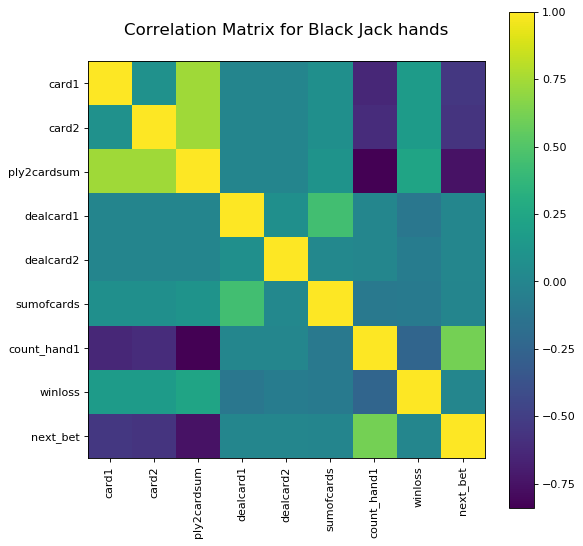

In [67]:
# Correlation matrix:
plotCorrelationMatrix(blkjck_hnds, 8)